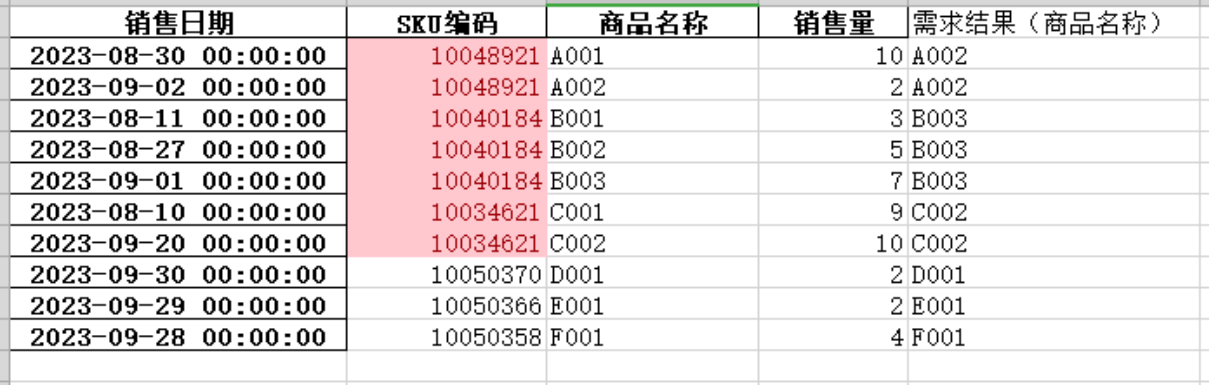

按sku编码分组后，对日期进行升序排列，商品名称全部替换成日期最新对应的一个值

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df

,销售日期,SKU编码,商品名称,销售量
0,2023-08-30,10048921,A001,10
1,2023-09-02,10048921,A002,2
2,2023-08-11,10040184,B001,3
3,2023-08-27,10040184,B002,5
4,2023-09-01,10040184,B003,7
5,2023-08-10,10034621,C001,9
6,2023-09-20,10034621,C002,10
7,2023-09-30,10050370,D001,2
8,2023-09-29,10050366,E001,2
9,2023-09-28,10050358,F001,4


In [81]:
def func(sku: int):
    d = df.loc[df.SKU编码==sku]
    return d.sort_values('销售日期').商品名称.tail(1).squeeze()

In [82]:
df.assign(结果=df.SKU编码.apply(func))

,销售日期,SKU编码,商品名称,销售量,结果
0,2023-08-30,10048921,A001,10,A002
1,2023-09-02,10048921,A002,2,A002
2,2023-08-11,10040184,B001,3,B003
3,2023-08-27,10040184,B002,5,B003
4,2023-09-01,10040184,B003,7,B003
5,2023-08-10,10034621,C001,9,C002
6,2023-09-20,10034621,C002,10,C002
7,2023-09-30,10050370,D001,2,D001
8,2023-09-29,10050366,E001,2,E001
9,2023-09-28,10050358,F001,4,F001


In [83]:
# 如果需要属性可以用以下方法利用三方库进行分组并行计算
def func(d: pd.DataFrame):
    return d.sort_values('销售日期').商品名称.tail(1).squeeze()

df.groupby('SKU编码', as_index=False).apply(func)

,SKU编码,None
0,10034621,C002
1,10040184,B003
2,10048921,A002
3,10050358,F001
4,10050366,E001
5,10050370,D001
